# Решение задачи кредитного скоринга

На занятии мы рассмотрели пример обучения моделей машинного обучения на данных "Бостон" с использованием языка Python и библиотеки Sklearn. В этом задании вы рассмотрите другой набор данных, построите и проанализируете на этих данных линейную модель и постараетесь немного повысить ее качество.

В отличие от задания с домами Бостона, данные в этой задаче не сразу готовы для построения модели, и нам потребуется предварительно посмотреть на данные и предобработать их. Вам нужно только выполнить ячейки с предобработкой данных и прочитать сопутствующий текст. Вашей задачей будет построить модель на уже предобработанных данных. Все задания отмечены жирным текстом __Задание__.

При выполнении заданий пользуйтесь [таблицей с подсказками](https://github.com/nadiinchi/intro_sklearn/blob/master/Cheatsheet.pdf) и примером с занятия [1_boston_task](https://github.com/nadiinchi/intro_sklearn/blob/master/1_boston_task_solution.ipynb).

__Внимание:__ вам нужно обязательно выполнить все ячейки с уже написанным кодом, чтобы избежать появляющихся ошибок. Для этого нужно либо нажимать на каждую ячейку с кодом и нажимать Run на верхней панели, либо один раз выполнить команду Run all above (инструкция будет дана в начале блока самостоятелньой работы ниже).

### Описание данных

Мы будем решать задачу кредитного скоринга. В данных имеются следующие признаки (этот список необязательно изучать подробно):
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивается кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения target, то есть задачу бинарной классификации.

По описанию данных понятно, что все признаки числовые (включая вещественные, порядковые, бинарные), кроме предпоследнего, который является категориальным.

### 1. Загрузка, визуализация и предварительный анализ данных

Для данных кредитного скоринга нам понадобится выполнить предобработку данных, используя некоторое количество команд, которые мы ранее не разбирали. Эти команды не понадобятся в части для самостоятельной работы.

Используем модуль pandas и его функцию read_excel для загрузки данных:

In [1]:
import pandas as pd
%matplotlib inline 
# служебная команда для графиков

In [2]:
tab = pd.read_excel("scoring.xlsx")

Посмотрим на первые 10 строк с помощью функции head:

In [3]:
tab.head(10)

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,1311.0,2,2,1,4,34.0,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,1552.0,1,3,1,1,31.0,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,451.0,1,3,1,4,21.0,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,4036.0,0,1,1,3,25.0,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,909.5,1,2,1,4,37.0,1,...,1,1,1,0,0,0,0,1,education,0
5,1,0.24,3,1032.0,1,0,1,2,34.0,1,...,1,1,1,0,1,0,0,0,furniture,0
6,1,0.09,4,750.5,1,4,1,3,34.0,2,...,1,1,1,0,0,1,0,0,education,0
7,-1,0.12,2,450.0,0,2,1,2,23.0,1,...,1,0,1,0,0,1,0,1,car_new,0
8,1,0.36,3,4043.0,2,4,1,4,42.0,4,...,1,1,1,0,0,1,0,1,car_new,0
9,-1,0.42,3,2185.0,1,3,1,2,26.0,2,...,2,1,1,0,1,0,0,1,television,0


По строкам - объекты (клиенты), по столбцам - признаки, последний столбец - целевая переменная (1 - кредит выдан, 0 - в кредите отказано).

Сколько объектов и признаков?

In [4]:
tab.shape

(600, 21)

Посмотрим, сколько кредитов выдано и не выдано:

In [5]:
class_counts = tab["target"].value_counts()
class_counts

1    300
0    300
Name: target, dtype: int64

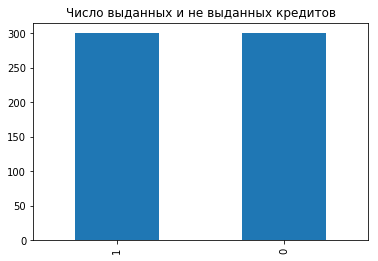

In [6]:
class_counts.plot(kind='bar', title="Число выданных и не выданных кредитов")

Выданных и невыданных кредитов поровну - это хорошо, так как это упрощает обучение и позволяет использовать легко интерпретируемую метрику accuracy (доля правильных ответов).

Посмотрим общие статистики по данным:

In [7]:
tab.describe()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,target
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.083333,0.218783,2.410000,1735.245833,1.200000,2.348333,0.901667,2.831667,35.181667,1.366667,1.906667,1.150000,0.391667,0.965000,0.268333,0.205000,0.343333,0.186667,0.691667,0.500000
std,0.915306,0.127492,1.098747,1545.026093,0.924531,1.208069,0.298013,1.103945,11.416182,0.565174,0.662334,0.357369,0.488530,0.183933,0.443462,0.404038,0.475218,0.389969,0.462190,0.500417
min,-1.000000,0.040000,0.000000,125.000000,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.120000,2.000000,681.625000,1.000000,2.000000,1.000000,2.000000,26.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.180000,2.000000,1173.500000,1.000000,2.000000,1.000000,3.000000,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,1.000000,0.270000,4.000000,2159.375000,1.000000,3.000000,1.000000,4.000000,41.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2.000000,0.720000,4.000000,9212.000000,4.000000,4.000000,1.000000,4.000000,75.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


По этой таблице можно отвечать на вопросы вида "Есть ли пропуски в данных?" и
"Все ли признаки одного масштаба?", чтобы лучше понять, какая требуется предобработка данных. В нашем случае пропусков нет (в строке count всегда 600), однако признаки имеют разный масштаб: есть признаки, измеряющиеся в тысячах (например, amount), а есть признаки, измеряющиеся в единицах (например, account и employment). Это может негативно сказаться на качестве обученной модели и усложняет интерпретацию весов (нельзя сравнивать веса, если признаки имеют разный масштаб). Поэтому ниже мы перенормируем признаки, чтобы они все принимали значения от 0 до 1: это никак не испортит наши данные и решит указанные проблемы.

Посмотрим на гистограммы признаков:

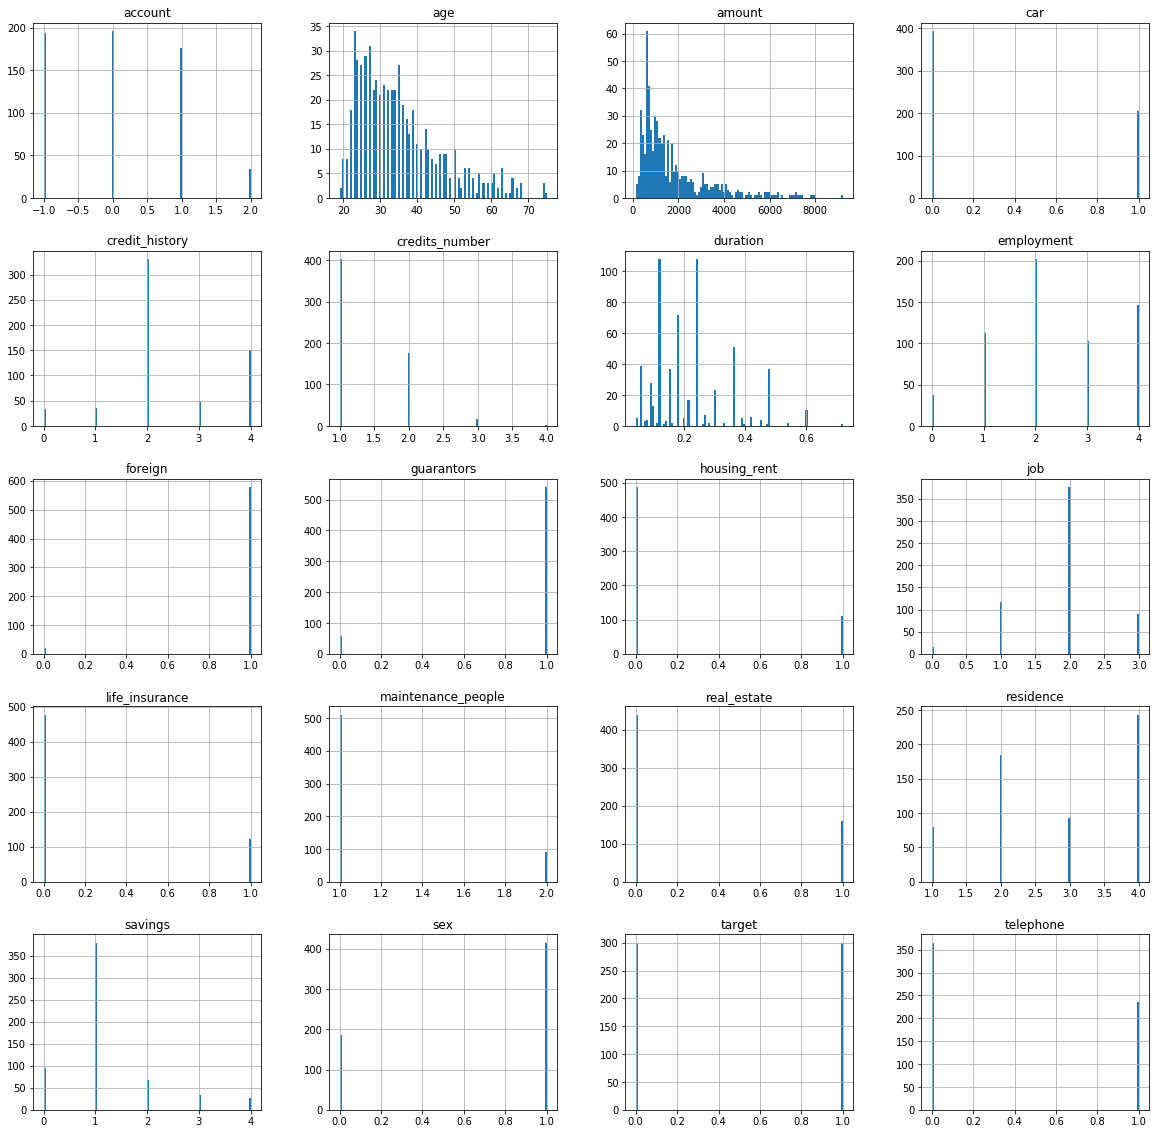

In [8]:
smth = tab.hist(figsize=(20, 20), bins=100)

Примеры вопросов, на которые можно отвечать по гистограммам (с ответами):
* Признаки каких типов присутствуют в данных? - вещественные, порядковые, бинарные
* Есть ли в данных ненужные признаки (например, всегда равные одному значению)? - нет
* Нет ли ошибок в данных? - нет. Например, минимальный возраст 18, что соответствует стандартной практике (раньше 18 лет кредиты не выдают).

### 2. Подготовка данных

Выделим отдельно признаки и целевую переменную. Для простоты исключим категориальный признак "цель кредита" (при создании переменной X удалим последние два столбца).

In [9]:
X = tab[tab.columns[:-2]]
y = tab["target"]

В предыдущем разделе мы увидели, что признаки имеют разный масштаб. Это помешает нам интерпретировать веса линейной модели, а также может усложнить обучение. Поэтому мы приведем признаки в один масштаб. Воспользуемся библиотекой sklearn:

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X[:3]

array([[0.66666667, 0.20588235, 0.5       , 0.13051612, 0.5       ,
        0.5       , 1.        , 1.        , 0.26785714, 0.        ,
        0.66666667, 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        ],
       [0.        , 0.20588235, 0.        , 0.15703753, 0.25      ,
        0.75      , 1.        , 0.        , 0.21428571, 0.        ,
        0.66666667, 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.        , 0.11764706, 0.5       , 0.03587543, 0.25      ,
        0.75      , 1.        , 1.        , 0.03571429, 0.        ,
        0.66666667, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 1.        ]])

Теперь значения во всех столбцах от 0 до 1!

### Задания для самостоятельной работы

Теперь мы готовы к тому, чтобы повторить шаги, которые мы выполняли в задании с домами Бостона: разделение данных на обучение и контроль, построение и анализ модели.

При выполнении заданий используйте примеры кода из задания про дома Бостона, а также [__таблицу с подсказками__](https://github.com/nadiinchi/intro_sklearn/blob/master/Cheatsheet.pdf) (у нее две страницы!).

Обязательно выполните все предыдущие ячейки. Для этого нажмите на эту ячейку, затем выберите в меню Cell -> Run all above (если вы не выполняли все предыдущие ячейки по одной).

#### Задача 1. Разделение данных на обучение и контроль

Используйте функцию train_test_split, чтобы разделить выборку X, y на обучение и контроль. Задайте test_size = 0.3 (30% выборки - размер тестовой части).

Не забудьте выполнить ячейку с импортом метода (следующая ячейка).

In [ ]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

### 3. Обучение  модели

#### Задача 2.  Обучение линейной модели

Обучите линейную модель на обучающих данных. Используйте метод LogisticRegression (метод линейной классификации).

Не забудьте выполнить ячейку с импортом метода (следующая ячейка).

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = 


### 4. Получение предсказаний

#### Задача 3. Предсказания линейной модели

Выполните предсказания линейной модели на обучающей и тестовой выборказ.

### 5. Оценивание качества модели

#### Задача 4. Качество линейной модели

Оцените качество линейной модели на обучающей и тестовой выборках - вычислите значения метрики accuracy_score для двух выборов. Воспользуемся метрикой accuracy и импортируем функцию accuracy_score. Эту функцию нужно использовать точно так же, как функцию mean_absolute_error из задания про Бостон, однако она оценивает качество классификации, а не регрессии. 

Не забудьте выполнить ячейку с импортом метрики (следующая ячейка).

In [ ]:
from sklearn.metrics import accuracy_score

Качесто модели не очень высокое, но сильно выше самого простого базового решения - всегда предсказывать класс 0 (такой алгоритм будет иметь точность 0.5). Обратите внимание, что печатается результат в долях - для перевода в проценты его нужно домножить на сто.

В этом задании вы построили линейную модель на данных кредитного скоринга. Чтобы улучшить модель, можно было бы попробовать использовать категориальный признак "цель кредита", подобрать гиперпараметры метода и попробовать другие методы, как мы этот делали в задании с Бостоном.